# Import Data

In [1]:
import graphviz #graphiz is a graph visualization software
import sklearn 
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()



------class run complete------



# Grid Search

NOTE: The results of Grid Search are not taken into account for the final model as it doesn't give good accuracy but it was observed that the model given by Grid Search generalising well on the test data. This was seen in cross validation.

In [2]:
#perfrom grid search to find the best parameters for the decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [2,3, 4, 6, 8, 10],
    'min_samples_leaf': [2, 3, 4, 5, 10, 20],
    'min_samples_split': [8, 10, 12, 20, 22, 25, 30],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42), param_grid = param_grid,
                            cv = 5, n_jobs = -1, verbose = 2, scoring='f1')

# Fit the grid search to the data
dt_not_used= grid_search.fit(X_train, y_train)

#print the best parameters, best score and the best estimator
print(dt_not_used.best_params_)
print(dt_not_used.best_score_)
print(dt_not_used.best_estimator_)


Fitting 5 folds for each of 504 candidates, totalling 2520 fits
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 25}
0.7935414689607431
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10,
                       min_samples_split=25, random_state=42)


# Final Model

In [3]:
#NOTE: DON'T REQUIRE SCALING
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt = DecisionTreeClassifier(criterion = 'gini',max_depth=4, random_state=42, min_samples_leaf= 2, min_samples_split=20) 
#max_depth: The maximum depth of the tree.
#random_state: Controls the randomness of the estimator.
#min_samples_leaf: The minimum number of samples required to be at a leaf node.
#min_samples_split: The minimum number of samples required to split an internal node.

# Fit the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("----------Decision Tree Classifier Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct


#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr1 = classification_report(y_test, y_pred)
print(cr1)



----------Decision Tree Classifier Metrics----------

Accuracy: 0.9
Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1 Score: 0.918918918918919

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.89      0.94      0.92        36

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60



## Confusion Matrix

[[20  4]
 [ 2 34]]


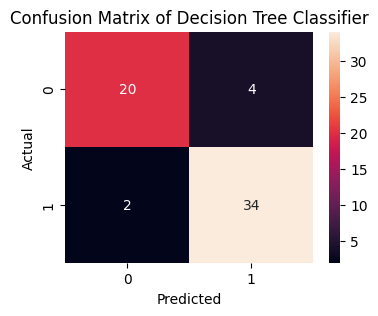

In [4]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
axes, fig = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Graph

In [5]:
#visualize the tree using graphviz 
from sklearn.tree import export_graphviz 
'''
export_graphviz(
        dt_clf, #the decision tree classifier
        out_file="C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\ML\\heart_tree4.dot", #the file to which the tree is exported
        feature_names= features, 
        class_names=target_names, 
        rounded=True, #rounded corners
        filled=True #color the boxes
)

#convert the dot file to png file in cmd
#use the following command:
#dot -Tpng heart_tree4.dot -o heart_tree.png
'''

'\nexport_graphviz(\n        dt_clf, #the decision tree classifier\n        out_file="C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\ML\\heart_tree4.dot", #the file to which the tree is exported\n        feature_names= features, \n        class_names=target_names, \n        rounded=True, #rounded corners\n        filled=True #color the boxes\n)\n\n#convert the dot file to png file in cmd\n#use the following command:\n#dot -Tpng heart_tree4.dot -o heart_tree.png\n'

## Cross validation

In [6]:
#cross validaayion for 10 folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="accuracy") #scorinf can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
#get the mean of the scores
print("\nMean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #the lower the standard deviation, the better the model
#standard deviation is calculated for the scores of each fold
#get the variance of the scores
print("Variance:", scores.var()) #the lower the variance, the better the model

Fold 0 : 0.75
Fold 1 : 0.8333333333333334
Fold 2 : 0.8333333333333334
Fold 3 : 0.7916666666666666
Fold 4 : 0.5833333333333334
Fold 5 : 0.625
Fold 6 : 0.6666666666666666
Fold 7 : 0.7083333333333334
Fold 8 : 0.7916666666666666
Fold 9 : 0.7391304347826086

Mean: 0.7322463768115942
Standard Deviation: 0.08149274846837636
Variance: 0.006641068052930056


## ROC

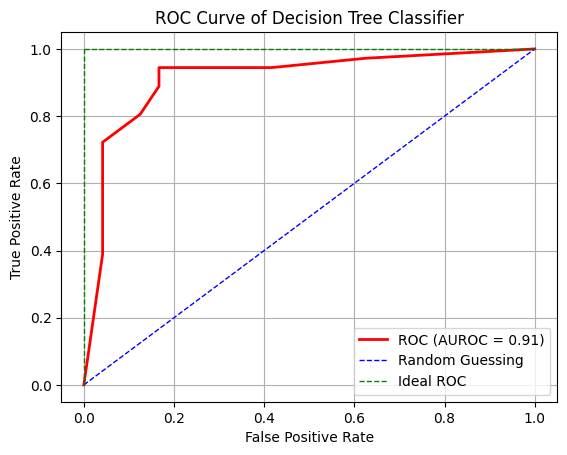

In [7]:
#plot roc curve for the model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#plot the roc curve
y_pred_proba = dt.predict_proba(X_test)[::,1] #get the probability of the positive class. [::,1] means get the second column of the array
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba) # _ is a placeholder for the threshold values
auc = roc_auc_score(y_test, y_pred_proba).round(2) #round the auc score to 2 decimal places
plt.plot(fpr,tpr,'r', label="ROC (AUROC = %0.2f)" % auc, linewidth = 2) 

#plot the random guessing line and the ideal roc line
plt.plot([0,1],[0,1],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal ROC")
plt.plot([0,0],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Decision Tree Classifier")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## PRC

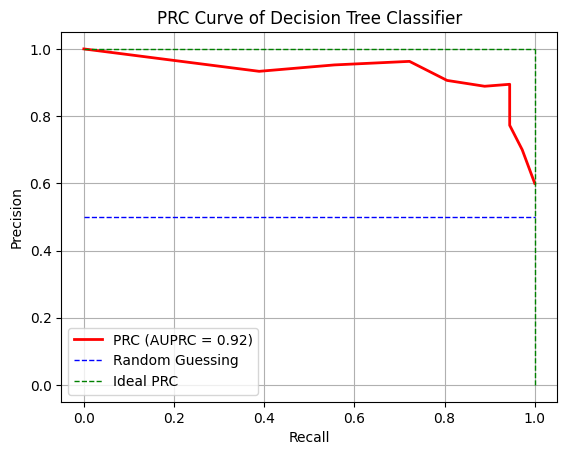

In [8]:
# plot PRC for the model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

#plot the PRC curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)  # _ is a placeholder for the threshold values
average_precision = average_precision_score(y_test, y_pred_proba).round(2)
plt.plot(recall, precision,'r', label="PRC (AUPRC = %0.2f)" % average_precision, linewidth = 2)
#average precision is the area under the PRC curve

#plot the ideal PRC curve and random guessing PRC curve
plt.plot([0,1],[0.5,0.5],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal PRC")
plt.plot([1,1],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC Curve of Decision Tree Classifier")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Learning Curve

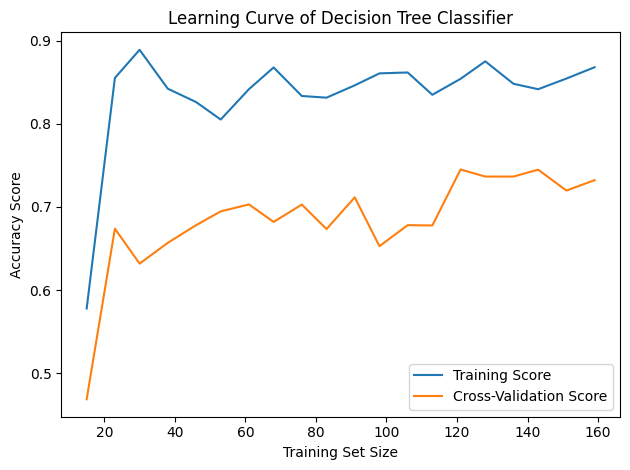

In [9]:
#plot the learning curve for the model
#use Recall as the scoring metric because the model should idealy minimize the number of false negatives.
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(dt, X_train, y_train, cv=3, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,20))

#plot the learning curve
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of Decision Tree Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()

#Conclusions:
#The model is slightly overfitting the training data because the training score is higher than the cross-validation score.
#The model is not generalizing well to the test data because the cross-validation score is low.

# Save Model

In [10]:
import joblib
joblib.dump(dt, "joblib_dump/DT.pkl")

['joblib_dump/DT.pkl']